**Vulnerability Model** for the **HH** Category: High Vulnerability and High Resilience

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
import eli5
from eli5.sklearn import PermutationImportance
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SequentialFeatureSelector

In [3]:
# Read in data and define x and y
df = pd.read_csv('7_vulnerability_HH.csv')
y = df['vulnerability']
x = df.drop(['NAME','Kmeans_t','vulnerability'], axis = 1)

,NAME,Kmeans_t,vulnerability,pre_mean_an,pre_std_an,daily_80,wetday,temp_mean_an,maxtemp_mean,temp_std_an,...,sport_1000,edu_1000,parkA,nointerR,fac_1000,popinR,disabR,asthmaR,physicalR,mentalR
0,5001.0,HH,6.733234,-0.817034,-0.627969,-0.630071,1.087857,-0.565302,-0.735286,0.550062,...,-0.111512,0.473511,-0.533625,-0.081990,0.525652,0.101425,-0.500305,0.255020,-0.759501,0.184909
1,5002.0,HH,6.157196,-0.817896,-0.631833,-0.630071,1.087857,-0.565762,-0.729311,0.567868,...,-0.111512,-0.929628,-0.584170,-1.616693,-0.340930,0.166255,-1.691815,-0.005291,-1.022999,-0.200579
2,5003.0,HH,6.693390,-0.814247,-0.612690,-0.630071,1.087857,-0.564106,-0.759189,0.504274,...,-0.111512,1.585308,0.215445,-0.219941,1.212205,-0.123775,-1.848954,0.341791,-0.575053,0.535353
3,5004.0,HH,6.511564,-0.748036,-0.606342,-0.630071,-0.919239,-0.541751,-0.804229,0.389805,...,-0.111512,-0.929628,-0.584170,-0.547574,-0.340930,0.040007,-0.173822,0.992568,0.478937,1.271285
4,5005.0,HH,6.565842,-0.806168,-0.544791,-0.630071,-0.919239,-0.561898,-0.783016,0.425417,...,-0.111512,0.204887,-0.535282,0.435326,-0.340930,-0.784019,-1.142591,0.038094,-0.970299,-0.130491
5,5006.0,HH,6.625684,-0.806168,-0.544791,-0.630071,-0.919239,-0.561898,-0.783016,0.425417,...,-0.111512,0.199514,-0.570912,-1.151109,-0.340930,-0.185193,-1.748263,0.558716,-0.496004,0.535353
6,5008.0,HH,6.809328,-0.760137,-0.577075,-0.630071,-0.919239,-0.696487,-0.871678,0.494099,...,-0.111512,-0.929628,-0.193063,-0.004393,-0.340930,0.268619,0.265557,0.688872,0.162740,0.710575
7,5014.0,HH,6.397518,-0.780410,-0.568137,-0.630071,-0.919239,-0.636690,-0.822455,0.458486,...,-0.111512,0.900547,-0.584170,-0.737257,-0.340930,0.727548,-1.112079,0.211635,-0.496004,-0.200579
8,5015.0,HH,6.352632,-0.746794,-0.578384,-0.630071,1.087857,-0.786274,-0.901258,0.561508,...,-0.111512,-0.271269,-0.094458,-0.642415,-0.340930,0.775318,-0.658969,0.515331,0.136390,0.465264
9,5017.0,HH,7.334917,-0.746278,-0.577932,-0.856234,1.087857,-0.782134,-0.901258,0.550062,...,-0.111512,1.573028,-0.381988,1.332006,1.204811,-2.026029,0.308275,0.341791,0.610686,0.395175


1. Run the random forest exposure model

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END ..max_depth=10, max_features=sqrt, n_e

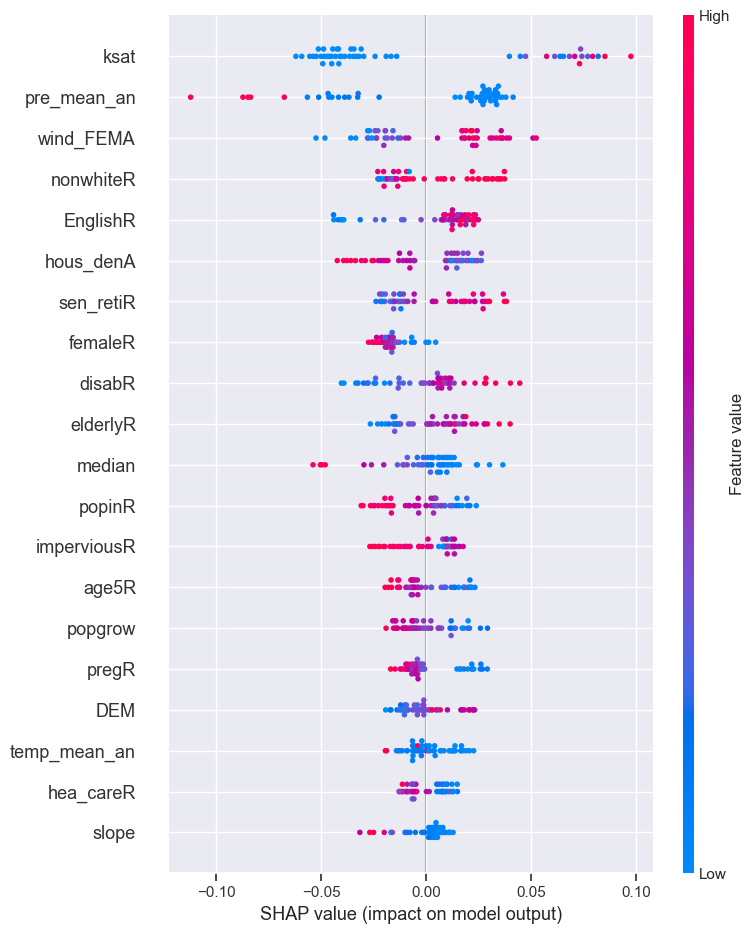

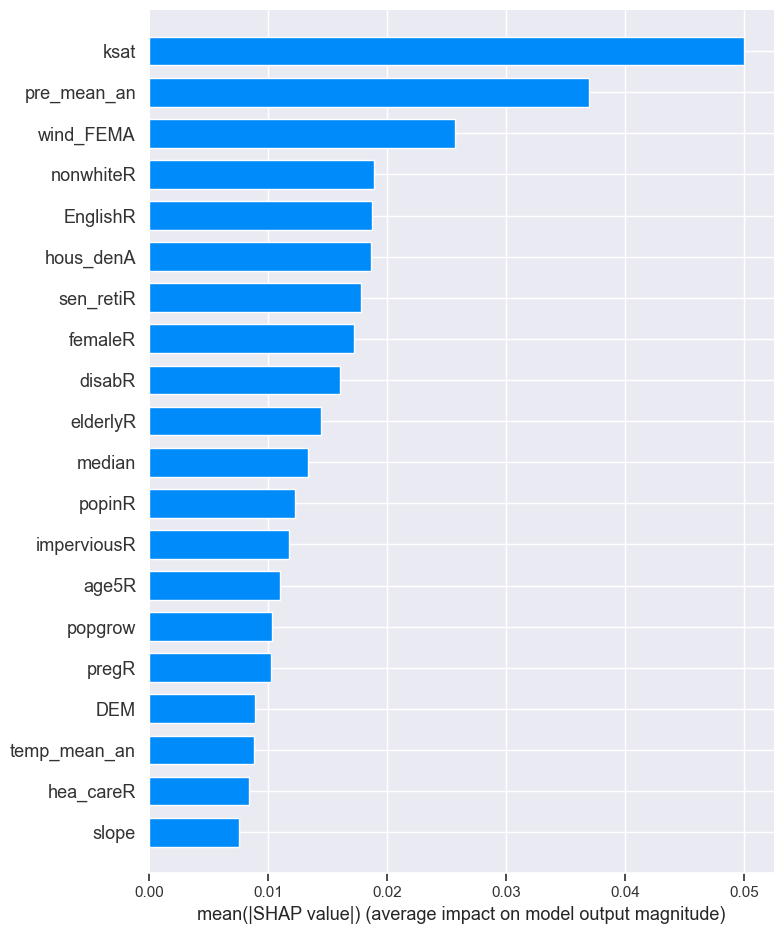

[0.3826]
[0.351385650959558]
[0.2056209273819971]
[0.16106600627230236]
[0.590112898038805]
{'max_depth': 10, 'max_features': None, 'n_estimators': 50}


In [9]:
# Lists to store performance metrics
R2_CV_list = [] # Cross-validated R² scores
R2_oob_list = [] # Out-of-bag R² score
RMSE_list = [] # Root Mean Squared Error
MAE_list = [] # Mean Absolute Error
R2_list = [] # R² scores

# Run the model for a specific random state (seed = 42)
for i in range(42, 43):
    # Split data into training and testing sets (70% train, 30% test)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = i)
    
    # Define a parameter grid for GridSearchCV to find the best hyperparameters
    my_param_grid = {
        'n_estimators': [50, 100, 200],  # Number of trees in the forest
        'max_features': ['sqrt', 'log2', None],  # Number of features to consider at each split
        'max_depth': [10, 20, 30],  # Maximum depth of the trees (None allows unlimited depth)
    }

    # Use GridSearchCV to find the best combination of parameters
    grid = GridSearchCV(
        estimator = RandomForestRegressor(random_state = i), 
        param_grid = my_param_grid, 
        refit = True, 
        verbose=2, 
        cv=5
    )
    grid.fit(x_train, y_train)
    
    # Extract the best hyperparameters after GridSearchCV
    best_params = grid.best_params_
    max_depth_value = best_params.get('max_depth')
    max_features_value = best_params.get('max_features')
    n_estimators_value = best_params.get('n_estimators')

    # Train the RandomForestRegressor with the best parameters
    RF_regression = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators= n_estimators_value, 
        random_state = i
    )
    RF_regression.fit(x_train, y_train)
    y_hat = RF_regression.predict(x_test) # Predict test set

    # Store predictions in a DataFrame for reference
    predictions = pd.DataFrame({'y_test':y_test, 'y_hat':y_hat})
    
    # Calculate cross-validated R² score
    R2 = cross_val_score(
        estimator = RandomForestRegressor(
            max_depth = max_depth_value, 
            max_features= max_features_value, 
            n_estimators= n_estimators_value, 
            random_state = i
        ), 
        X = x_train, 
        y = y_train, 
        cv = 5, 
        scoring = "r2"
    )
    R2_CV = round(np.mean(R2),4)
    R2_CV_list.append(R2_CV)

    # Calculate out-of-bag R² score
    RF_oob = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators= n_estimators_value,
        oob_score=True,
        random_state = i
    )
    RF_oob.fit(x_train, y_train)
    R2_oob_list.append(RF_oob.oob_score_)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_hat))
    RMSE_list.append(rmse)
    
    # Calculate MAE
    mae = mean_absolute_error(y_test, y_hat)
    MAE_list.append(mae)
    
    # Calculate R²
    r2 = r2_score(y_test, y_hat)
    R2_list.append(r2)

    # Perform permutation importance analysis
    rf = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators=n_estimators_value, 
        oob_score=True, 
        random_state = i
    )
    rf.fit(x_train, y_train)
    result = permutation_importance(rf, x_test, y_test, n_repeats=10, random_state=i)

    # Extract feature importance and sort by importance
    perm_importances = result.importances_mean
    perm_std = result.importances_std
    sorted_idx = perm_importances.argsort()
    feature_names = x_test.columns
    pd.DataFrame(
        {'Importance': perm_importances, "Std": perm_std},
        index=feature_names[sorted_idx]).sort_values('Importance',ascending=False)

    # Calculate feature importance using PermutationImportance
    rf_1 = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators=n_estimators_value,
        oob_score=True, 
        random_state = i
    )
    rf_1.fit(x_train,y_train)
    perm = PermutationImportance(rf_1, random_state = i).fit(x_test, y_test)
    importance = perm.feature_importances_

    feature_names = x_test.columns
    pd.DataFrame({'Importance': importance},
             index=feature_names[sorted_idx]).sort_values('Importance',ascending=False)

    # Use SHAP to explain the predictions
    explainer = shap.TreeExplainer(rf)
    shap_values = explainer.shap_values(x_test)
    shap.summary_plot(shap_values, features = x_test)
    shap.summary_plot(shap_values, features=x, feature_names=x_test.columns, plot_type='bar')

# Print the collected metrics and the best parameters from GridSearchCV
print("Cross-validated R² scores:", R2_CV_list)
print("Out-of-bag R² scores:", R2_oob_list)
print("RMSE values:", RMSE_list)
print("MAE values:", MAE_list)
print("R² scores:", R2_list)
print("Best parameters:", grid.best_params_)

2. Backward feature selection

In [13]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize the Random Forest model with out-of-bag error estimation
rf_model = RandomForestRegressor(
    max_depth = 10, 
    max_features = None, 
    n_estimators= 50, 
    random_state=42
)

sfs = SequentialFeatureSelector(
    rf_model, 
    n_features_to_select="auto",
    direction='backward', 
    cv=5
)
sfs.fit(x_train, y_train)

# Selected features
selected_features = x.columns[sfs.get_support()]
print("Selected features with Sequential Feature Selector:", selected_features)


Selected features with Sequential Feature Selector: Index(['pre_mean_an', 'pre_std_an', 'temp_mean_an', 'temp_std_an', 'LST',
       'solar_horiz', 'pop', 'popdenA', 'popgrow', 'femaleR', 'elderlyR',
       'agedeR', 'age5R', 'EnglishR', 'nonwhiteR', 'pregR', 'sen_aloneR',
       'median', 'land_ownR', 'home_rentR', 'transR', 'hea_careR', 'sen_retiR',
       'river_lenA', 'slope', 'ksat', 'imperviousR', 'NDVI', 'change_forestR',
       'dis_water', 'bldg_year', 'child_1000', 'nointerR', 'fac_1000',
       'popinR', 'physicalR'],
      dtype='object')


              pre_mean_an  pre_std_an  daily_80    wetday  temp_mean_an  \
pre_mean_an      1.000000    0.988588  0.977619  0.597329      0.987116   
pre_std_an       0.988588    1.000000  0.972656  0.590256      0.982605   
daily_80         0.977619    0.972656  1.000000  0.546772      0.969014   
wetday           0.597329    0.590256  0.546772  1.000000      0.614036   
temp_mean_an     0.987116    0.982605  0.969014  0.614036      1.000000   
...                   ...         ...       ...       ...           ...   
popinR           0.019798    0.021724  0.026478  0.020673      0.026003   
disabR          -0.214133   -0.247278 -0.261446 -0.228201     -0.256395   
asthmaR         -0.681831   -0.658349 -0.674156 -0.471194     -0.662158   
physicalR       -0.226264   -0.230372 -0.240215 -0.215675     -0.244602   
mentalR         -0.188852   -0.169494 -0.187724 -0.061836     -0.176421   

              maxtemp_mean  temp_std_an       LST  wind_FEMA  solar_horiz  \
pre_mean_an       0.97

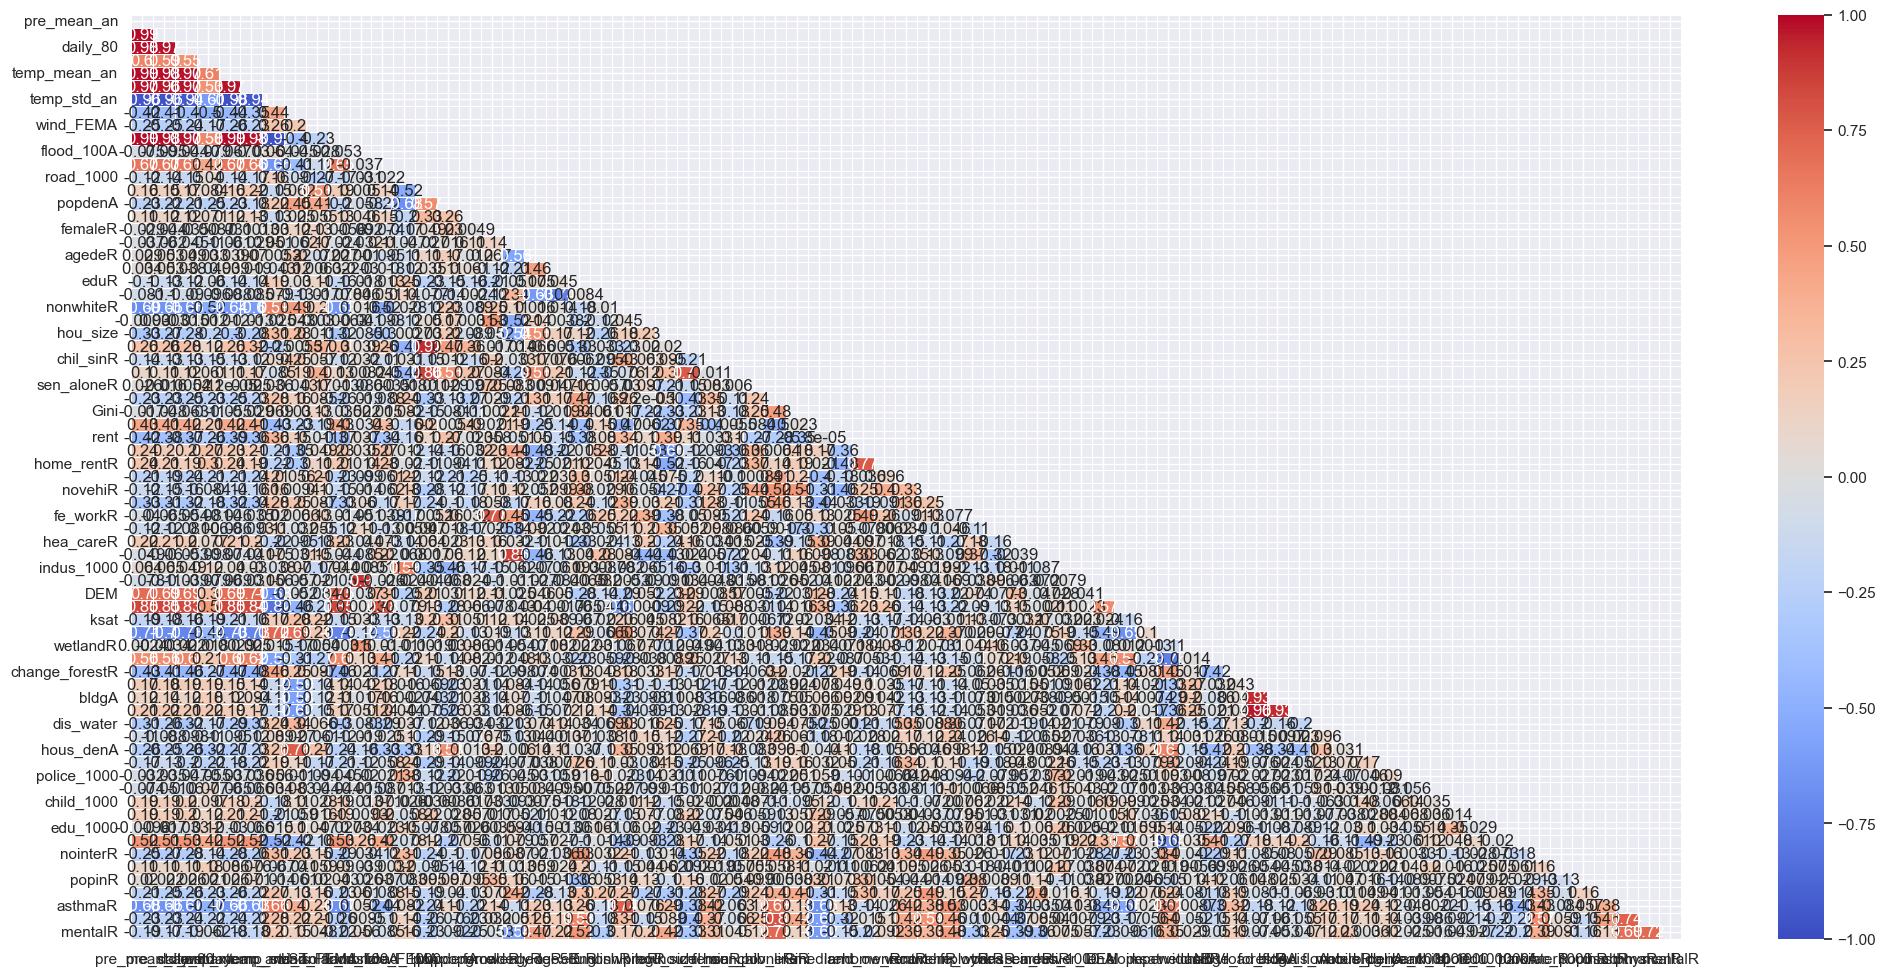

In [14]:
# Calculate the correlation matrix to analyze the relationships between features
correlation_matrix = x.corr()
print(correlation_matrix)

# Create a mask to only show the lower triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(25, 12))

# Plot the heatmap with the x-axis labels aligned horizontally
sns.heatmap(
    correlation_matrix, 
    mask=mask, 
    annot=True, 
    cmap="coolwarm",
    vmin=-1, 
    vmax=1, 
    center=0, 
    linewidths=0.5, 
    linecolor='white',
    cbar_kws={"orientation": "vertical"}
)

# Rotate the x-axis labels to be horizontal
plt.xticks(rotation=0)

# Show the plot
plt.show()

3. Rerun the random forest exposure model

In [ ]:
y = df['vulnerability']
x = df[['pre_mean_an', 'pre_std_an', 'temp_mean_an', 'temp_std_an', 'LST',
       'solar_horiz', 'pop', 'popdenA', 'popgrow', 'femaleR', 'elderlyR',
       'agedeR', 'age5R', 'EnglishR', 'nonwhiteR', 'pregR', 'sen_aloneR',
       'median', 'land_ownR', 'home_rentR', 'transR', 'hea_careR', 'sen_retiR',
       'river_lenA', 'slope', 'ksat', 'imperviousR', 'NDVI', 'change_forestR',
       'dis_water', 'bldg_year', 'child_1000', 'nointerR', 'fac_1000',
       'popinR', 'physicalR']]

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END ..max_depth=10, max_features=sqrt, n_e

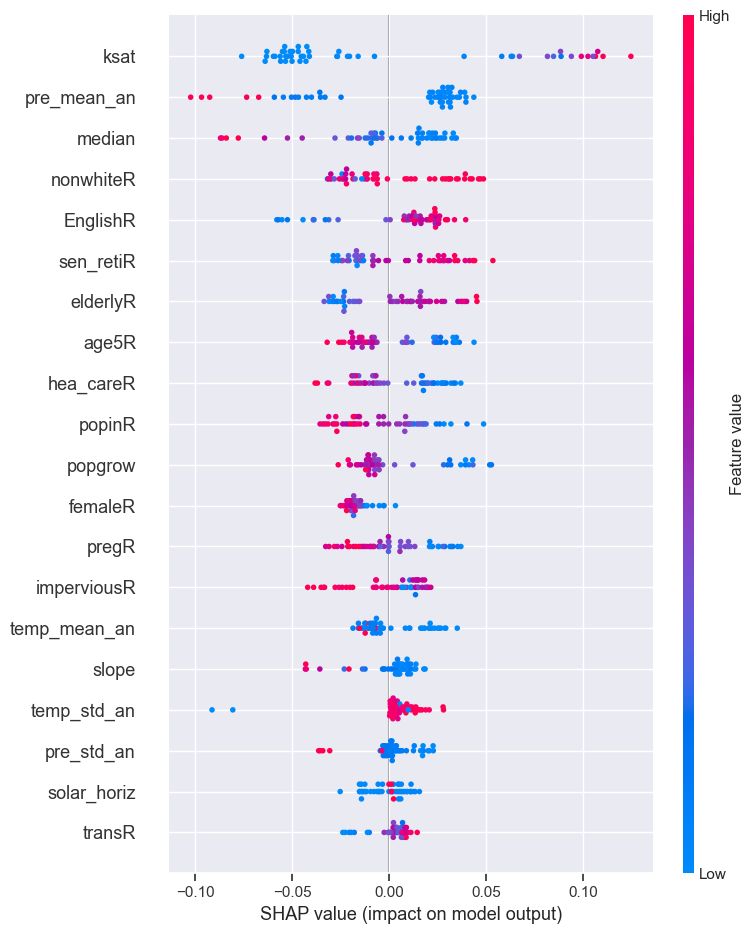

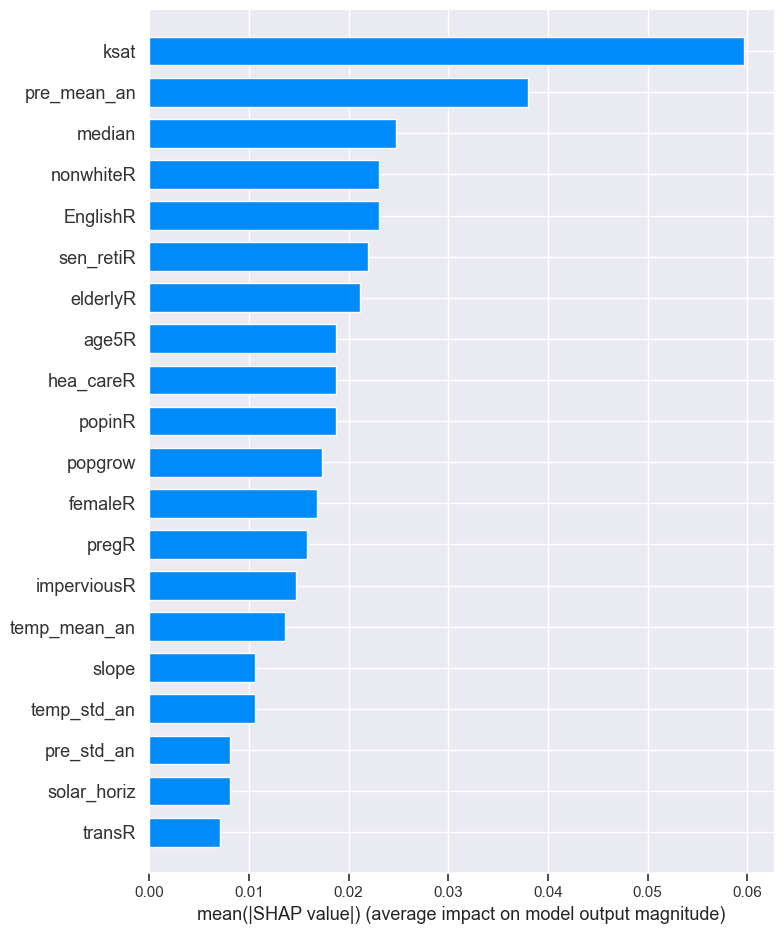

[0.4601]
[0.40926599062246694]
[0.2184171119443078]
[0.17928697383047876]
[0.5375093620201528]
{'max_depth': 10, 'max_features': None, 'n_estimators': 50}


In [21]:
# Lists to store performance metrics
R2_CV_list = [] # Cross-validated R² scores
R2_oob_list = [] # Out-of-bag R² score
RMSE_list = [] # Root Mean Squared Error
MAE_list = [] # Mean Absolute Error
R2_list = [] # R² scores

# Run the model for a specific random state (seed = 42)
for i in range(42, 43):
    # Split data into training and testing sets (70% train, 30% test)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = i)
    
    # Define a parameter grid for GridSearchCV to find the best hyperparameters
    my_param_grid = {
        'n_estimators': [50, 100, 200],  # Number of trees in the forest
        'max_features': ['sqrt', 'log2', None],  # Number of features to consider at each split
        'max_depth': [10, 20, 30],  # Maximum depth of the trees (None allows unlimited depth)
    }

    # Use GridSearchCV to find the best combination of parameters
    grid = GridSearchCV(
        estimator = RandomForestRegressor(random_state = i), 
        param_grid = my_param_grid, 
        refit = True, 
        verbose=2, 
        cv=5
    )
    grid.fit(x_train, y_train)
    
    # Extract the best hyperparameters after GridSearchCV
    best_params = grid.best_params_
    max_depth_value = best_params.get('max_depth')
    max_features_value = best_params.get('max_features')
    n_estimators_value = best_params.get('n_estimators')

    # Train the RandomForestRegressor with the best parameters
    RF_regression = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators= n_estimators_value, 
        random_state = i
    )
    RF_regression.fit(x_train, y_train)
    y_hat = RF_regression.predict(x_test) # Predict test set

    # Store predictions in a DataFrame for reference
    predictions = pd.DataFrame({'y_test':y_test, 'y_hat':y_hat})
    
    # Calculate cross-validated R² score
    R2 = cross_val_score(
        estimator = RandomForestRegressor(
            max_depth = max_depth_value, 
            max_features= max_features_value, 
            n_estimators= n_estimators_value, 
            random_state = i
        ), 
        X = x_train, 
        y = y_train, 
        cv = 5, 
        scoring = "r2"
    )
    R2_CV = round(np.mean(R2),4)
    R2_CV_list.append(R2_CV)

    # Calculate out-of-bag R² score
    RF_oob = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators= n_estimators_value,
        oob_score=True,
        random_state = i
    )
    RF_oob.fit(x_train, y_train)
    R2_oob_list.append(RF_oob.oob_score_)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_hat))
    RMSE_list.append(rmse)
    
    # Calculate MAE
    mae = mean_absolute_error(y_test, y_hat)
    MAE_list.append(mae)
    
    # Calculate R²
    r2 = r2_score(y_test, y_hat)
    R2_list.append(r2)

    # Perform permutation importance analysis
    rf = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators=n_estimators_value, 
        oob_score=True, 
        random_state = i
    )
    rf.fit(x_train, y_train)
    result = permutation_importance(rf, x_test, y_test, n_repeats=10, random_state=i)

    # Extract feature importance and sort by importance
    perm_importances = result.importances_mean
    perm_std = result.importances_std
    sorted_idx = perm_importances.argsort()
    feature_names = x_test.columns
    pd.DataFrame(
        {'Importance': perm_importances, "Std": perm_std},
        index=feature_names[sorted_idx]).sort_values('Importance',ascending=False)

    # Calculate feature importance using PermutationImportance
    rf_1 = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators=n_estimators_value,
        oob_score=True, 
        random_state = i
    )
    rf_1.fit(x_train,y_train)
    perm = PermutationImportance(rf_1, random_state = i).fit(x_test, y_test)
    importance = perm.feature_importances_

    feature_names = x_test.columns
    pd.DataFrame({'Importance': importance},
             index=feature_names[sorted_idx]).sort_values('Importance',ascending=False)

    # Use SHAP to explain the predictions
    explainer = shap.TreeExplainer(rf)
    shap_values = explainer.shap_values(x_test)
    shap.summary_plot(shap_values, features = x_test)
    shap.summary_plot(shap_values, features=x, feature_names=x_test.columns, plot_type='bar')

# Print the collected metrics and the best parameters from GridSearchCV
print("Cross-validated R² scores:", R2_CV_list)
print("Out-of-bag R² scores:", R2_oob_list)
print("RMSE values:", RMSE_list)
print("MAE values:", MAE_list)
print("R² scores:", R2_list)
print("Best parameters:", grid.best_params_)

4. Perform backward feature selection again to identify and eliminate irrelevant variables, streamlining the model and improving its efficiency.

In [23]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize the Random Forest model with out-of-bag error estimation
rf_model = RandomForestRegressor(
    max_depth = 10, 
    max_features = None, 
    n_estimators= 50, 
    random_state=42
)

sfs = SequentialFeatureSelector(
    rf_model, 
    n_features_to_select="auto", 
    direction='backward', 
    cv=5
)
sfs.fit(x_train, y_train)

# Selected features
selected_features = x.columns[sfs.get_support()]
print("Selected features with Sequential Feature Selector:", selected_features)


Selected features with Sequential Feature Selector: Index(['pre_mean_an', 'popgrow', 'femaleR', 'elderlyR', 'age5R', 'EnglishR',
       'nonwhiteR', 'pregR', 'median', 'home_rentR', 'hea_careR', 'sen_retiR',
       'slope', 'ksat', 'imperviousR', 'dis_water', 'bldg_year', 'popinR'],
      dtype='object')


5. Rerun the random forest model

In [ ]:
y = df['vulnerability']
x = df[['pre_mean_an', 'popgrow', 'femaleR', 'elderlyR', 'age5R', 'EnglishR',
       'nonwhiteR', 'pregR', 'median', 'home_rentR', 'hea_careR', 'sen_retiR',
       'slope', 'ksat', 'imperviousR', 'dis_water', 'bldg_year', 'popinR']]

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END ..max_depth=10, max_features=sqrt, n_e

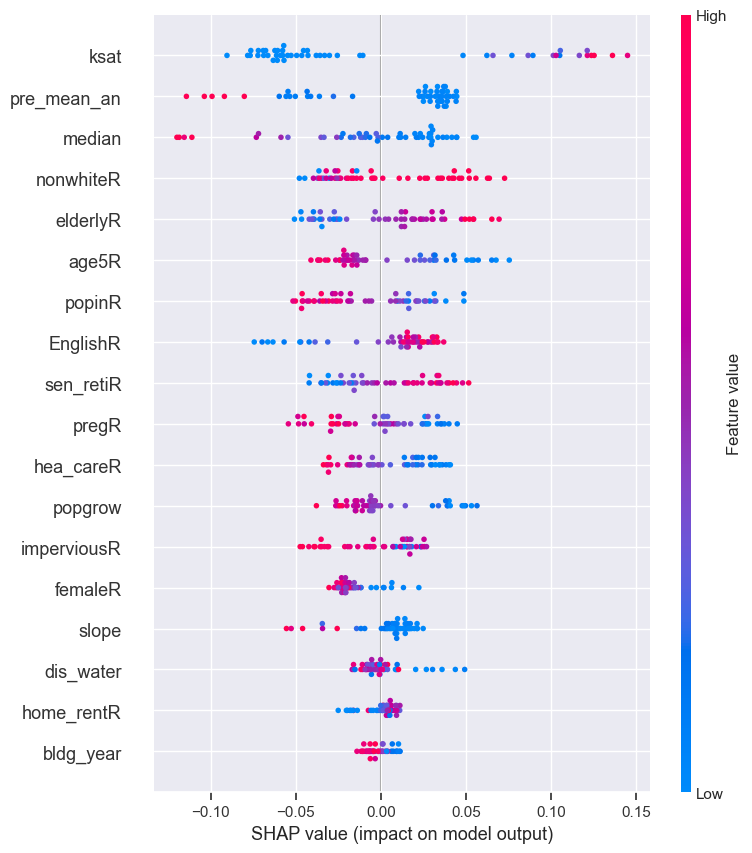

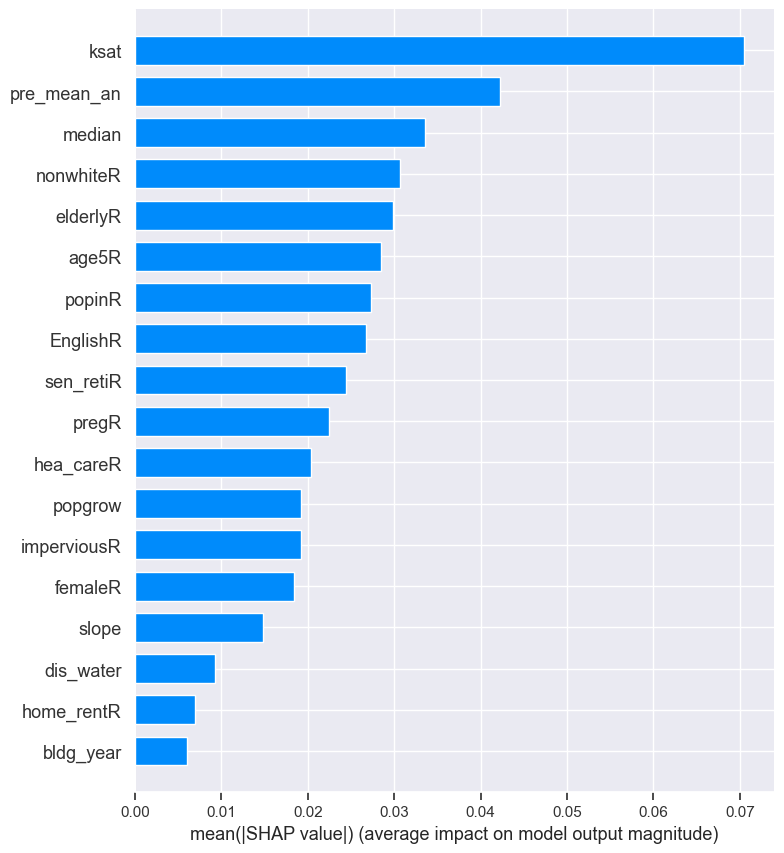

[0.4971]
[0.44117863497418053]
[0.22093341221777624]
[0.1761705380026808]
[0.5267916214852858]
{'max_depth': 10, 'max_features': None, 'n_estimators': 50}


In [29]:
# Lists to store performance metrics
R2_CV_list = [] # Cross-validated R² scores
R2_oob_list = [] # Out-of-bag R² score
RMSE_list = [] # Root Mean Squared Error
MAE_list = [] # Mean Absolute Error
R2_list = [] # R² scores

# Run the model for a specific random state (seed = 42)
for i in range(42, 43):
    # Split data into training and testing sets (70% train, 30% test)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = i)
    
    # Define a parameter grid for GridSearchCV to find the best hyperparameters
    my_param_grid = {
        'n_estimators': [50, 100, 200],  # Number of trees in the forest
        'max_features': ['sqrt', 'log2', None],  # Number of features to consider at each split
        'max_depth': [10, 20, 30],  # Maximum depth of the trees (None allows unlimited depth)
    }

    # Use GridSearchCV to find the best combination of parameters
    grid = GridSearchCV(
        estimator = RandomForestRegressor(random_state = i), 
        param_grid = my_param_grid, 
        refit = True, 
        verbose=2, 
        cv=5
    )
    grid.fit(x_train, y_train)
    
    # Extract the best hyperparameters after GridSearchCV
    best_params = grid.best_params_
    max_depth_value = best_params.get('max_depth')
    max_features_value = best_params.get('max_features')
    n_estimators_value = best_params.get('n_estimators')

    # Train the RandomForestRegressor with the best parameters
    RF_regression = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators= n_estimators_value, 
        random_state = i
    )
    RF_regression.fit(x_train, y_train)
    y_hat = RF_regression.predict(x_test) # Predict test set

    # Store predictions in a DataFrame for reference
    predictions = pd.DataFrame({'y_test':y_test, 'y_hat':y_hat})
    
    # Calculate cross-validated R² score
    R2 = cross_val_score(
        estimator = RandomForestRegressor(
            max_depth = max_depth_value, 
            max_features= max_features_value, 
            n_estimators= n_estimators_value, 
            random_state = i
        ), 
        X = x_train, 
        y = y_train, 
        cv = 5, 
        scoring = "r2"
    )
    R2_CV = round(np.mean(R2),4)
    R2_CV_list.append(R2_CV)

    # Calculate out-of-bag R² score
    RF_oob = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators= n_estimators_value,
        oob_score=True,
        random_state = i
    )
    RF_oob.fit(x_train, y_train)
    R2_oob_list.append(RF_oob.oob_score_)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_hat))
    RMSE_list.append(rmse)
    
    # Calculate MAE
    mae = mean_absolute_error(y_test, y_hat)
    MAE_list.append(mae)
    
    # Calculate R²
    r2 = r2_score(y_test, y_hat)
    R2_list.append(r2)

    # Perform permutation importance analysis
    rf = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators=n_estimators_value, 
        oob_score=True, 
        random_state = i
    )
    rf.fit(x_train, y_train)
    result = permutation_importance(rf, x_test, y_test, n_repeats=10, random_state=i)

    # Extract feature importance and sort by importance
    perm_importances = result.importances_mean
    perm_std = result.importances_std
    sorted_idx = perm_importances.argsort()
    feature_names = x_test.columns
    pd.DataFrame(
        {'Importance': perm_importances, "Std": perm_std},
        index=feature_names[sorted_idx]).sort_values('Importance',ascending=False)

    # Calculate feature importance using PermutationImportance
    rf_1 = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators=n_estimators_value,
        oob_score=True, 
        random_state = i
    )
    rf_1.fit(x_train,y_train)
    perm = PermutationImportance(rf_1, random_state = i).fit(x_test, y_test)
    importance = perm.feature_importances_

    feature_names = x_test.columns
    pd.DataFrame({'Importance': importance},
             index=feature_names[sorted_idx]).sort_values('Importance',ascending=False)

    # Use SHAP to explain the predictions
    explainer = shap.TreeExplainer(rf)
    shap_values = explainer.shap_values(x_test)
    shap.summary_plot(shap_values, features = x_test)
    shap.summary_plot(shap_values, features=x, feature_names=x_test.columns, plot_type='bar')

# Print the collected metrics and the best parameters from GridSearchCV
print("Cross-validated R² scores:", R2_CV_list)
print("Out-of-bag R² scores:", R2_oob_list)
print("RMSE values:", RMSE_list)
print("MAE values:", MAE_list)
print("R² scores:", R2_list)
print("Best parameters:", grid.best_params_)

6. Perform backward feature selection again to identify and eliminate irrelevant variables, streamlining the model and improving its efficiency.

In [31]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize the Random Forest model with out-of-bag error estimation
rf_model = RandomForestRegressor(
    max_depth = 10, 
    max_features = None, 
    n_estimators= 50, 
    random_state=42
)

sfs = SequentialFeatureSelector(
    rf_model, 
    n_features_to_select="auto", 
    direction='backward', 
    cv=5
)
sfs.fit(x_train, y_train)

# Selected features
selected_features = x.columns[sfs.get_support()]
print("Selected features with Sequential Feature Selector:", selected_features)

Selected features with Sequential Feature Selector: Index(['femaleR', 'age5R', 'nonwhiteR', 'median', 'hea_careR', 'sen_retiR',
       'slope', 'ksat', 'imperviousR'],
      dtype='object')


7. Rerun the random forest vulnerability model

In [ ]:
y = df['vulnerability']
x = df[['femaleR', 'age5R', 'nonwhiteR', 'median', 'hea_careR', 'sen_retiR',
       'slope', 'ksat', 'imperviousR']]

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END ..max_depth=10, max_features=sqrt, n_e

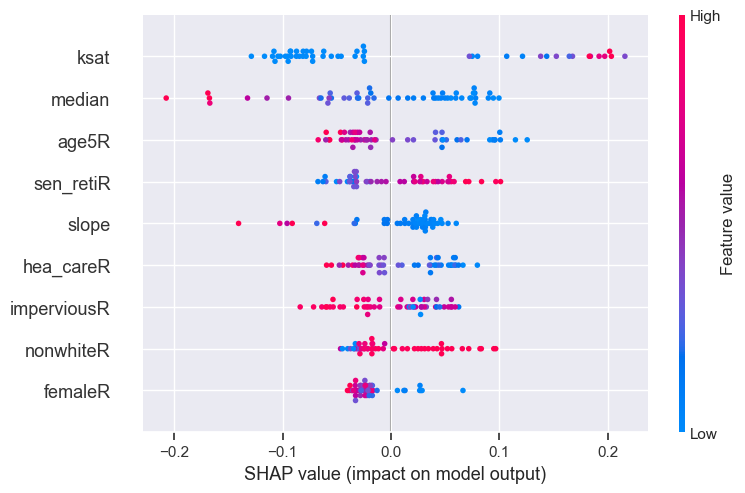

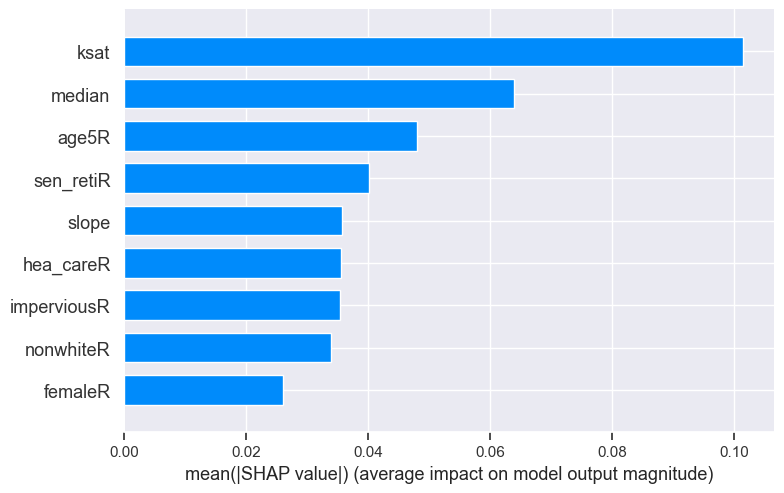

[0.5328]
[0.4663806426257683]
[0.21225215928679617]
[0.1728430116199999]
[0.5632490487338726]
{'max_depth': 20, 'max_features': None, 'n_estimators': 50}


In [37]:
# Lists to store performance metrics
R2_CV_list = [] # Cross-validated R² scores
R2_oob_list = [] # Out-of-bag R² score
RMSE_list = [] # Root Mean Squared Error
MAE_list = [] # Mean Absolute Error
R2_list = [] # R² scores

# Run the model for a specific random state (seed = 42)
for i in range(42, 43):
    # Split data into training and testing sets (70% train, 30% test)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = i)
    
    # Define a parameter grid for GridSearchCV to find the best hyperparameters
    my_param_grid = {
        'n_estimators': [50, 100, 200],  # Number of trees in the forest
        'max_features': ['sqrt', 'log2', None],  # Number of features to consider at each split
        'max_depth': [10, 20, 30],  # Maximum depth of the trees (None allows unlimited depth)
    }

    # Use GridSearchCV to find the best combination of parameters
    grid = GridSearchCV(
        estimator = RandomForestRegressor(random_state = i), 
        param_grid = my_param_grid, 
        refit = True, 
        verbose=2, 
        cv=5
    )
    grid.fit(x_train, y_train)
    
    # Extract the best hyperparameters after GridSearchCV
    best_params = grid.best_params_
    max_depth_value = best_params.get('max_depth')
    max_features_value = best_params.get('max_features')
    n_estimators_value = best_params.get('n_estimators')

    # Train the RandomForestRegressor with the best parameters
    RF_regression = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators= n_estimators_value, 
        random_state = i
    )
    RF_regression.fit(x_train, y_train)
    y_hat = RF_regression.predict(x_test) # Predict test set

    # Store predictions in a DataFrame for reference
    predictions = pd.DataFrame({'y_test':y_test, 'y_hat':y_hat})
    
    # Calculate cross-validated R² score
    R2 = cross_val_score(
        estimator = RandomForestRegressor(
            max_depth = max_depth_value, 
            max_features= max_features_value, 
            n_estimators= n_estimators_value, 
            random_state = i
        ), 
        X = x_train, 
        y = y_train, 
        cv = 5, 
        scoring = "r2"
    )
    R2_CV = round(np.mean(R2),4)
    R2_CV_list.append(R2_CV)

    # Calculate out-of-bag R² score
    RF_oob = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators= n_estimators_value,
        oob_score=True,
        random_state = i
    )
    RF_oob.fit(x_train, y_train)
    R2_oob_list.append(RF_oob.oob_score_)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_hat))
    RMSE_list.append(rmse)
    
    # Calculate MAE
    mae = mean_absolute_error(y_test, y_hat)
    MAE_list.append(mae)
    
    # Calculate R²
    r2 = r2_score(y_test, y_hat)
    R2_list.append(r2)

    # Perform permutation importance analysis
    rf = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators=n_estimators_value, 
        oob_score=True, 
        random_state = i
    )
    rf.fit(x_train, y_train)
    result = permutation_importance(rf, x_test, y_test, n_repeats=10, random_state=i)

    # Extract feature importance and sort by importance
    perm_importances = result.importances_mean
    perm_std = result.importances_std
    sorted_idx = perm_importances.argsort()
    feature_names = x_test.columns
    pd.DataFrame(
        {'Importance': perm_importances, "Std": perm_std},
        index=feature_names[sorted_idx]).sort_values('Importance',ascending=False)

    # Calculate feature importance using PermutationImportance
    rf_1 = RandomForestRegressor(
        max_depth = max_depth_value, 
        max_features= max_features_value, 
        n_estimators=n_estimators_value,
        oob_score=True, 
        random_state = i
    )
    rf_1.fit(x_train,y_train)
    perm = PermutationImportance(rf_1, random_state = i).fit(x_test, y_test)
    importance = perm.feature_importances_

    feature_names = x_test.columns
    pd.DataFrame({'Importance': importance},
             index=feature_names[sorted_idx]).sort_values('Importance',ascending=False)

    # Use SHAP to explain the predictions
    explainer = shap.TreeExplainer(rf)
    shap_values = explainer.shap_values(x_test)
    shap.summary_plot(shap_values, features = x_test)
    shap.summary_plot(shap_values, features=x, feature_names=x_test.columns, plot_type='bar')

# Print the collected metrics and the best parameters from GridSearchCV
print("Cross-validated R² scores:", R2_CV_list)
print("Out-of-bag R² scores:", R2_oob_list)
print("RMSE values:", RMSE_list)
print("MAE values:", MAE_list)
print("R² scores:", R2_list)
print("Best parameters:", grid.best_params_)